# Exercise 2
## Cleaning the data

Now we have the data downloaded. We can will have to clean the data so that it is appropriate for training.

In [1]:
%matplotlib inline
import pandas as pd
bank_data = pd.read_csv('data/bank_data_feats.csv', index_col=0)

In [2]:
bank_data.head(n=20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure


Numerical columns
- age
- balance
- day
- duration
- campaign
- pdays
- previous

Binary columns
- default
- housing
- loan

Categorical columns to convert to dummy dummy columns
- job
- education
- marital
- contact
- month
- poutcome

We can use the `describe` function to examine some properties of the numerical columns

In [3]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


We can also look at the distribution of numerical values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10296deb8>,
      dtype=object)

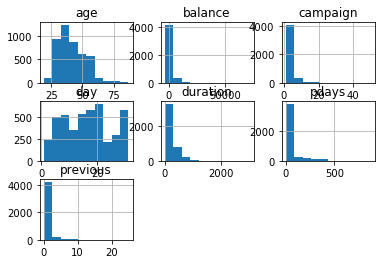

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
bank_data.hist()

### Converting non-numercal columns to numerical

#### Binary columns

Convert 'default' column to binary, rename to 'is_default'

In [5]:
bank_data['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

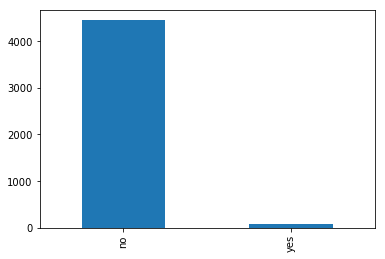

In [6]:
bank_data['default'].value_counts().plot(kind='bar')

We can see that this column is highly skewed, which makes sense, since according to the documentstion (data/bank-names.txt) this column indicates whether the customer has any credit in default.

In [7]:
bank_data['is_default'] = bank_data['default'].apply(lambda row: 1 if row == 'yes' else 0)

Let's look at the two columns side-by-side to get an understanding

In [8]:
bank_data[['default', 'is_default']].tail()

,default,is_default
4516,no,0
4517,yes,1
4518,no,0
4519,no,0
4520,no,0


Do the same for housing, confirming that there are only two options, yes, and no

In [9]:
bank_data['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

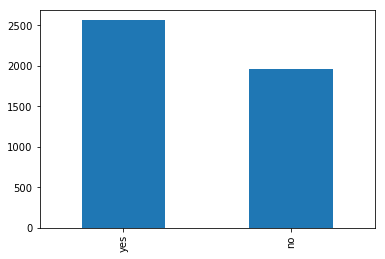

In [10]:
bank_data['housing'].value_counts().plot(kind='bar')

In [11]:
bank_data['is_housing'] = bank_data['housing'].apply(lambda row: 1 if row == 'yes' else 0)

Repeat for loan

In [12]:
bank_data['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

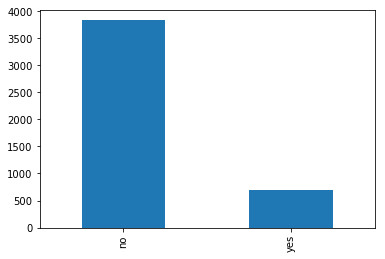

In [13]:
bank_data['loan'].value_counts().plot(kind='bar')

In [14]:
bank_data['is_loan'] = bank_data['loan'].apply(lambda row: 1 if row == 'yes' else 0)

### Categorical columns
The other columns are categorical so we will have to deal with them a little differently.

In [15]:
bank_data['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

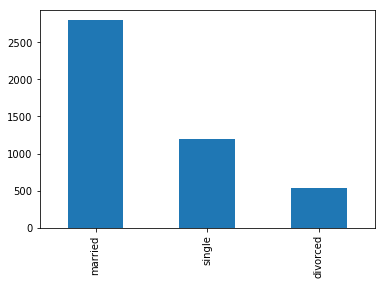

In [16]:
bank_data['marital'].value_counts().plot(kind='bar')

We can see that there are three options for the marital column, so we will make this a categorical column.

We can do this using the `get_dummies` function in the pandas library

In [17]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternativly, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        If `columns` i

In [18]:
marital_dummies = pd.get_dummies(bank_data['marital'])
pd.concat([bank_data['marital'], marital_dummies], axis=1).head(n=10)

,marital,divorced,married,single
0,married,0,1,0
1,married,0,1,0
2,single,0,0,1
3,married,0,1,0
4,married,0,1,0
5,single,0,0,1
6,married,0,1,0
7,married,0,1,0
8,married,0,1,0
9,married,0,1,0


We can see that there is a bit of redundant information here, we have three total options, but we know that whenever two of the columns are zero, the other column HAS to be 1, since everyone has to fall into one of the three options. We can then drop one of the columns and assume that a zero in the remaining columns means that the dropped column is true.

Here we will drop the `divorced` column and change the name of the remaining columns from `married` to `is_married` and from `single` to `is_single` for consistency and clarity.

In [19]:
marital_dummies.drop('divorced', axis=1, inplace=True)
marital_dummies.columns = [f'marital_{colname}' for colname in marital_dummies.columns]

In [20]:
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


Now we will join it back to the original dataset

In [21]:
bank_data = pd.concat([bank_data, marital_dummies], axis=1)

Let's do the same for the `job`, `education`, and `contact`

In [22]:
bank_data['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

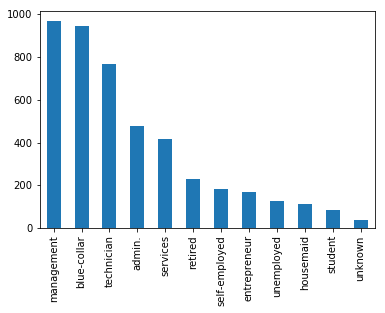

In [23]:
bank_data['job'].value_counts().plot(kind='bar')

The `unknown` value seems most appropriate to drop here

In [24]:
job_dummies = pd.get_dummies(bank_data['job'])
job_dummies.drop('unknown', axis=1, inplace=True)

Let's also rename the columns so we know they came from the job field

In [25]:
job_dummies.columns = [f'job_{colname}' for colname in job_dummies.columns]

In [26]:
bank_data = pd.concat([bank_data, job_dummies], axis=1)

In [27]:
bank_data['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

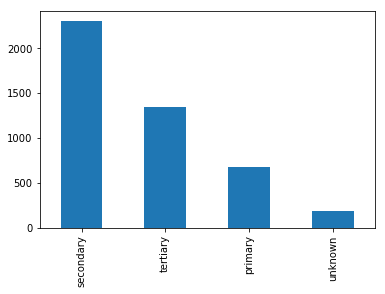

In [28]:
bank_data['education'].value_counts().plot(kind='bar')

In [29]:
edu_dummies = pd.get_dummies(bank_data['education'])
edu_dummies.drop('unknown', axis=1, inplace=True)
edu_dummies.columns = [f'education_{colname}' for colname in edu_dummies.columns]

In [30]:
bank_data = pd.concat([bank_data, edu_dummies], axis=1)

And for the contact field

In [31]:
bank_data['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

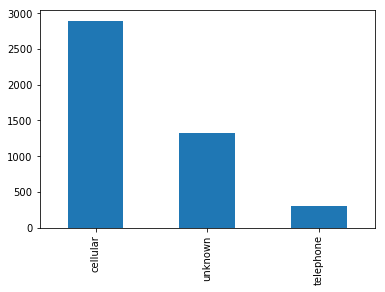

In [32]:
bank_data['contact'].value_counts().plot(kind='bar')

In [33]:
contact_dummies = pd.get_dummies(bank_data['contact'])
contact_dummies.drop('unknown', axis=1, inplace=True)
contact_dummies.columns = [f'contact_{colname}' for colname in contact_dummies.columns]
bank_data = pd.concat([bank_data, contact_dummies], axis=1)

For the `month` field we may want to do something a bit different because there is an inherent order to the months. In this case we may want to label the months in the chronological order. 

To do this we can create a map to represent the months as numbers and preserve the ordinality.

In [34]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}

In [35]:
bank_data['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

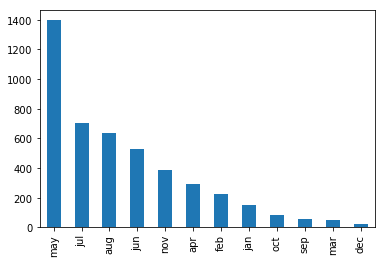

In [36]:
bank_data['month'].value_counts().plot(kind='bar')

Whoa! The month is highly skewed, I wonder why there are so many entries in May?

In [37]:
bank_data['month'] = bank_data['month'].map(month_map)

And finally we'll do the same thing for the `poutcome` column, the resultas from the previous campaign.

In [38]:
bank_data['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

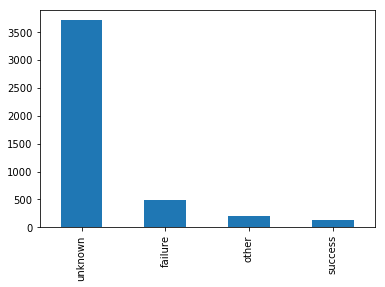

In [39]:
bank_data['poutcome'].value_counts().plot(kind='bar')

In [40]:
poutcome_dummies = pd.get_dummies(bank_data['poutcome'])
poutcome_dummies.drop('unknown', axis=1, inplace=True)
poutcome_dummies.columns = [f'poutcome_{colname}' for colname in poutcome_dummies.columns]
bank_data = pd.concat([bank_data, poutcome_dummies], axis=1)

In [41]:
bank_data.iloc[0]

age                            30
job                    unemployed
marital                   married
education                 primary
default                        no
balance                      1787
housing                        no
loan                           no
contact                  cellular
day                            19
month                          10
duration                       79
campaign                        1
pdays                          -1
previous                        0
poutcome                  unknown
is_default                      0
is_housing                      0
is_loan                         0
marital_married                 1
marital_single                  0
job_admin.                      0
job_blue-collar                 0
job_entrepreneur                0
job_housemaid                   0
job_management                  0
job_retired                     0
job_self-employed               0
job_services                    0
job_student   

In [42]:
bank_data.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome'], axis=1, inplace=True, errors='ignore')

Let's check the data types to confirm that that the are all numerical

In [43]:
bank_data.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
is_default             int64
is_housing             int64
is_loan                int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
dtype: object

While the data may not be the most appropriate form to train a model, we can techincally train the model with it.
Later on in the lesson we will tackle some more appropriate methods to represent the variables that will result in better model performance.

We will save the models to csv files

In [44]:
bank_data.to_csv('data/bank_data_feats_a2.csv')

#### Target variable

We can do a similar task to the target variable by making all the columns into numerical data types.
We start by loading it in.

In [45]:
target = pd.read_csv('data/bank_data_target.csv', index_col=0)
target.head(n=10)

,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


This one should be easy since there's just one column, let's verify that there are only two options.

In [46]:
target['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

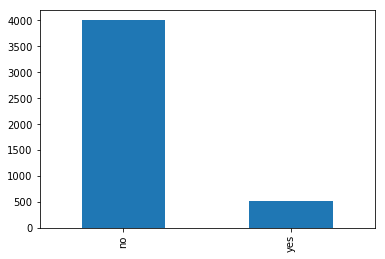

In [47]:
target['y'].value_counts().plot(kind='bar')

In [48]:
target['y'] = target['y'].apply(lambda row: 1 if row=='yes' else 0)
target.head(n=10)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [49]:
target.to_csv('data/bank_data_target_e2.csv')